<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
!pip3 install detecto

In [2]:
!pip install torch==1.4

     |████████████████████████████████| 753.4MB 21kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [3]:
!pip install torchvision==0.5.0

     |████████████████████████████████| 4.0MB 4.5MB/s 
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [4]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/objection detection')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model

from detecto import core, utils, visualize
from detecto.utils import read_image

# LOAD IMAGE

In [79]:
from google.colab import files
uploaded = files.upload()

Saving area65.jpg to area65.jpg


In [80]:
path_to_image = 'area65.jpg'

In [81]:
def load_image(img_path, show=False):
  
    img = image.load_img(img_path,target_size=None)
    
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor=tf.image.resize_with_crop_or_pad(img_tensor, 224, 224)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

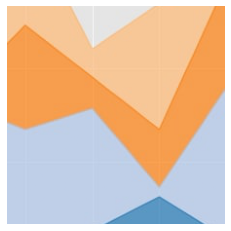

In [82]:
new_image = load_image(path_to_image, show=True)

BASELINE CNN

In [83]:
baseline = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/cnn baseline model')

In [84]:
classes = baseline.predict(new_image, verbose=1)

1/1 [==============================] - 0s 4ms/step


In [85]:
print(classes)

[[3.0990882e-10 6.1690333e-11 2.2660675e-05 2.0618052e-10 5.7167547e-21
  2.1956376e-07 9.9997711e-01]]


In [86]:
class_names=['AreaChart', 'BarChart', 'LineChart', 'ParetoChart', 'PieChart', 'RadarChart' ,'ScatterPlot' ]

In [87]:
def plot_image(predictions_array, input_img):
  img = input_img[0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color='green')

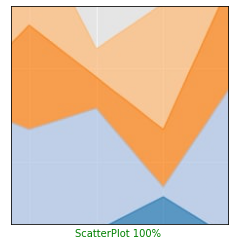

In [88]:
plot_image(classes[0], new_image)
plt.show()

# VGG16 - TRANSFER LEARNING

In [89]:
tl = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Transfer learning model')

In [90]:
classes_tl = tl.predict(new_image)

In [91]:
print(classes_tl)

[[2.6385067e-02 4.1662192e-13 2.1425143e-08 6.1582420e-11 4.0219358e-05
  9.7357464e-01 4.3591936e-10]]


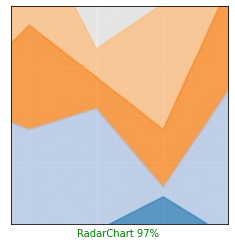

In [92]:
plot_image(classes_tl[0], new_image)
plt.show()

# OBJECT RECOGNITION

In [93]:
image2 = utils.read_image(path_to_image)

In [94]:
obj_det = core.Model.load('/content/drive/My Drive/Colab Notebooks/Obj det model noise/noise model.pth', ['title', 'legend', 'axis label'])

In [95]:
pred = obj_det.predict(image2)
label , box , score = pred

In [96]:
print(label)
print(box)
print(score)

['axis label', 'axis label', 'title', 'legend', 'axis label']
tensor([[349.3289, 567.2551, 467.3393, 593.2687],
        [ 35.5578, 246.4079,  65.0494, 356.2405],
        [330.8933,  30.9883, 498.2729,  62.1411],
        [104.2289,  65.4738, 183.1503, 176.6329],
        [333.3653,  32.2997, 488.4370,  60.0305]])
tensor([0.7804, 0.7103, 0.6387, 0.1391, 0.0650])


In [97]:
images =[]
images.append(image2)

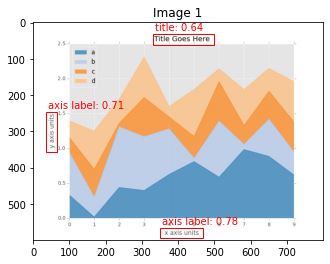

In [99]:
visualize.plot_prediction_grid(obj_det, images, score_filter=0.6)